In [13]:
import pandas as pd
from PIL import Image, ImageDraw

In [6]:
gt = pd.read_csv('/data/datasets/LaSOT/airplane/airplane-1/groundtruth.txt', header=None, names=['x', 'y', 'w', 'h'])
gt

,x,y,w,h
0,367,101,41,16
1,366,103,45,16
2,364,107,45,15
3,362,109,46,16
4,362,111,46,18
...,...,...,...,...
2783,174,154,358,110
2784,182,154,359,111
2785,194,152,360,110
2786,192,151,358,110


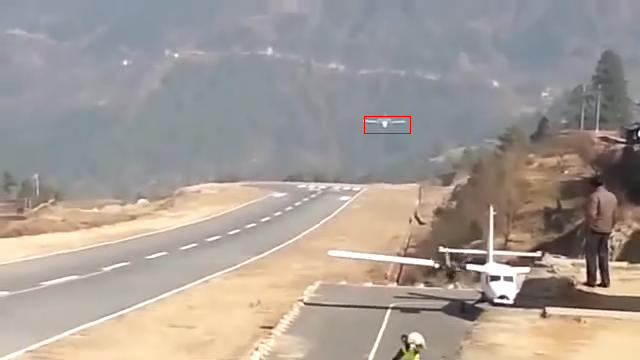

In [17]:
x, y, w, h = gt.iloc[6].tolist()
img = Image.open('/data/datasets/LaSOT/airplane/airplane-1/img/00000006.jpg')
draw = ImageDraw.Draw(img)
draw.rectangle([x, y, x+w, y+h], outline='red')
img